<a href="https://colab.research.google.com/github/Techbasu/master_solidity/blob/master/computer_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the tensorflow directory

In [8]:
import tensorflow as tf
from tensorflow import keras
from keras import layers

import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


# Loading the dataset

In [9]:
# Load in the data
cifar100 = tf.keras.datasets.cifar100

# Distribute it to train and test set
(x_train, y_train), (x_val, y_val) = cifar100.load_data()
print(x_train.shape, y_train.shape, x_val.shape, y_val.shape)


(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


#Printing the training image and training labels

label: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


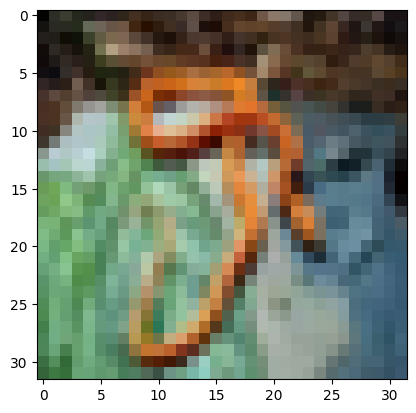

In [24]:
import numpy as np
import matplotlib.pyplot as plt

index=49

#set number of characters per row while printing
np.set_printoptions(linewidth=320)

#print the label and image

print(f'label: {y_train[index]}')

#plotting the grey scale image
plt.imshow(x_train[index])

# Visualization

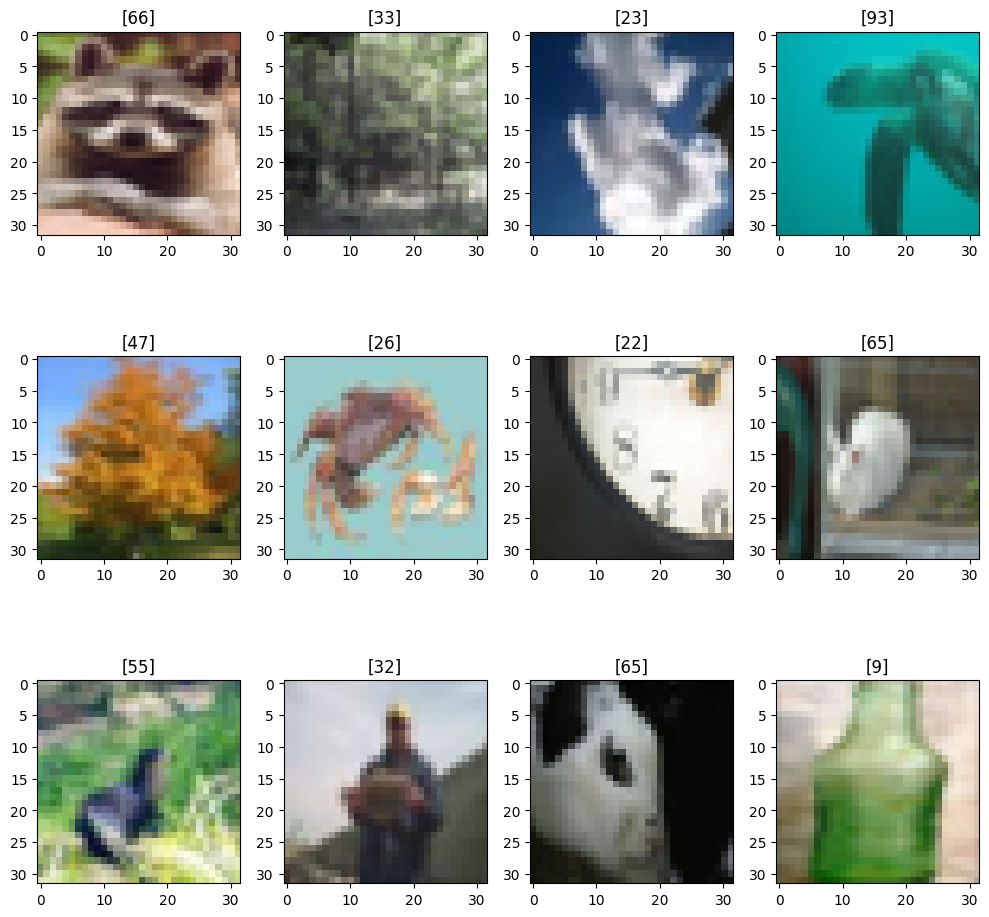

In [11]:
def show_samples(data, labels):
	plt.subplots(figsize=(10, 10))
	for i in range(12):
		plt.subplot(3, 4, i+1)
		k = np.random.randint(0, data.shape[0])
		plt.title(labels[k])
		plt.imshow(data[k])
	plt.tight_layout()
	plt.show()

show_samples(x_train, y_train)

# normalize the pixel value for train and test images

In [12]:
x_train=x_train/255.0
x_val=x_val/255.0

In [13]:
y_train = tf.one_hot(y_train,
                     depth=y_train.max() + 1,
                     dtype=tf.float64)
y_val = tf.one_hot(y_val,
                   depth=y_val.max() + 1,
                   dtype=tf.float64)

y_train = tf.squeeze(y_train)
y_val = tf.squeeze(y_val)

# Building the Classification model using tensorflow


In [15]:
model = tf.keras.models.Sequential([
    #Add convolutions and max pooling
	layers.Conv2D(16, (3, 3), activation='relu',
				input_shape=(32, 32, 3), padding='same'),
	layers.Conv2D(32, (3, 3),
				activation='relu',
				padding='same'),
	layers.Conv2D(64, (3, 3),
				activation='relu',
				padding='same'),
	layers.MaxPooling2D(2, 2),
	layers.Conv2D(128, (3, 3),
				activation='relu',
				padding='same'),

  # neural network layers
	layers.Flatten(),
	layers.Dense(256, activation='relu'),
	layers.BatchNormalization(),
	layers.Dense(256, activation='relu'),
	layers.Dropout(0.3),
	layers.BatchNormalization(),
	layers.Dense(100, activation='softmax')
])
model.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
    optimizer='adam',
    metrics=['AUC', 'accuracy']
)

In [16]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 16)        448       
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 conv2d_8 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 flatten_2 (Flatten)         (None, 32768)             0         
                                                      

In [17]:
#model fitting
hist = model.fit(x_train, y_train,
                 epochs=5,
                 batch_size=64,
                 verbose=1,
                 validation_data=(x_val, y_val))

Epoch 1/5
782/782 [==============================] - 668s 850ms/step - loss: 3.8749 - auc: 0.7886 - accuracy: 0.1198 - val_loss: 3.5563 - val_auc: 0.8311 - val_accuracy: 0.1818
Epoch 2/5
782/782 [==============================] - 656s 839ms/step - loss: 2.9888 - auc: 0.8948 - accuracy: 0.2589 - val_loss: 2.9083 - val_auc: 0.8934 - val_accuracy: 0.2944
Epoch 3/5
782/782 [==============================] - 651s 833ms/step - loss: 2.5195 - auc: 0.9267 - accuracy: 0.3540 - val_loss: 2.4185 - val_auc: 0.9306 - val_accuracy: 0.3733
Epoch 4/5
782/782 [==============================] - 634s 811ms/step - loss: 2.2043 - auc: 0.9447 - accuracy: 0.4175 - val_loss: 2.3371 - val_auc: 0.9300 - val_accuracy: 0.4007
Epoch 5/5
782/782 [==============================] - 642s 821ms/step - loss: 1.9169 - auc: 0.9570 - accuracy: 0.4825 - val_loss: 2.4042 - val_auc: 0.9206 - val_accuracy: 0.3905


In [27]:
import numpy as np

# Assuming you have an image you want to predict, load it here and preprocess it
# For example:
# image_to_predict = ... # Load your image and preprocess it just like you did for training data

# Make a prediction
predictions = model.predict(np.array([x_val[0]]))

# Get the class with the highest probability as the predicted class
predicted_class = np.argmax(predictions)

# Map the class index to a human-readable label (if you have a label mapping)
# For example, if you have a list of class labels like class_labels = ['cat', 'dog', ...]
# Then, you can get the label like this:
# predicted_label = class_labels[predicted_class]

# Print the result
print(f"Predicted class index: {predicted_class}")
# If you have labels mapping, you can print the label as well:
# print(f"Predicted class label: {predicted_label}")

1/1 [==============================] - 0s 38ms/step
Predicted class index: 49
